In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('Pumpkin_Seeds_Dataset.csv', encoding='latin-1')
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [12]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [14]:
unique_values = df['Class'].unique()
unique_values

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [15]:
df.shape

(2500, 13)

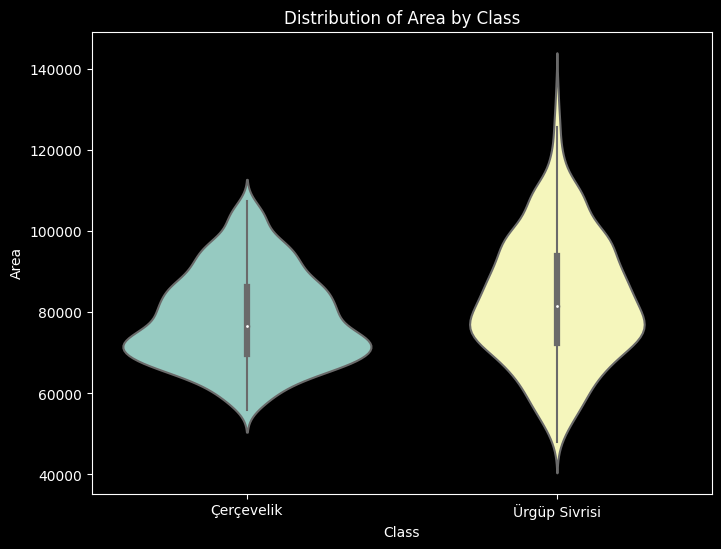

In [17]:
#Violin Plot: A violin plot combines a box plot and a kernel density plot, providing a visual representation of the distribution of a continuous variable. Each violin represents a different class or category.
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Area', data=df)
plt.title('Distribution of Area by Class')
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()

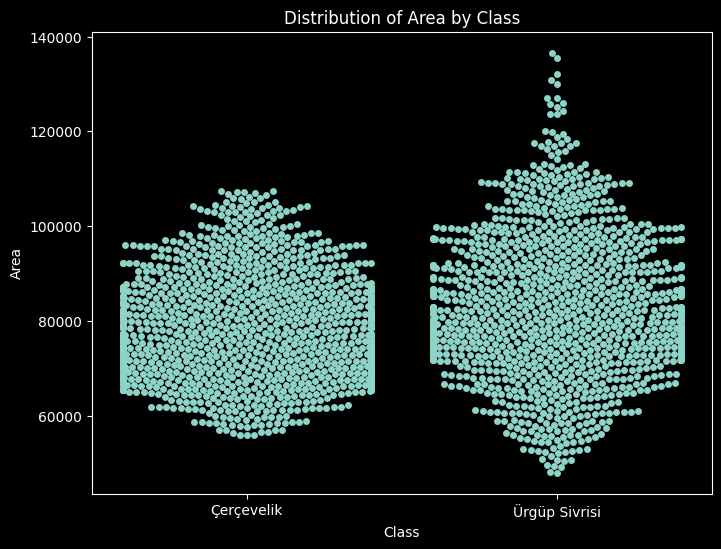

In [20]:
#Swarm Plot: A swarm plot displays individual data points along an axis, avoiding overlap by adjusting their positions. It can be useful for visualizing the distribution of categorical variables.
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Class', y='Area', data=df)
plt.title('Distribution of Area by Class')
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()

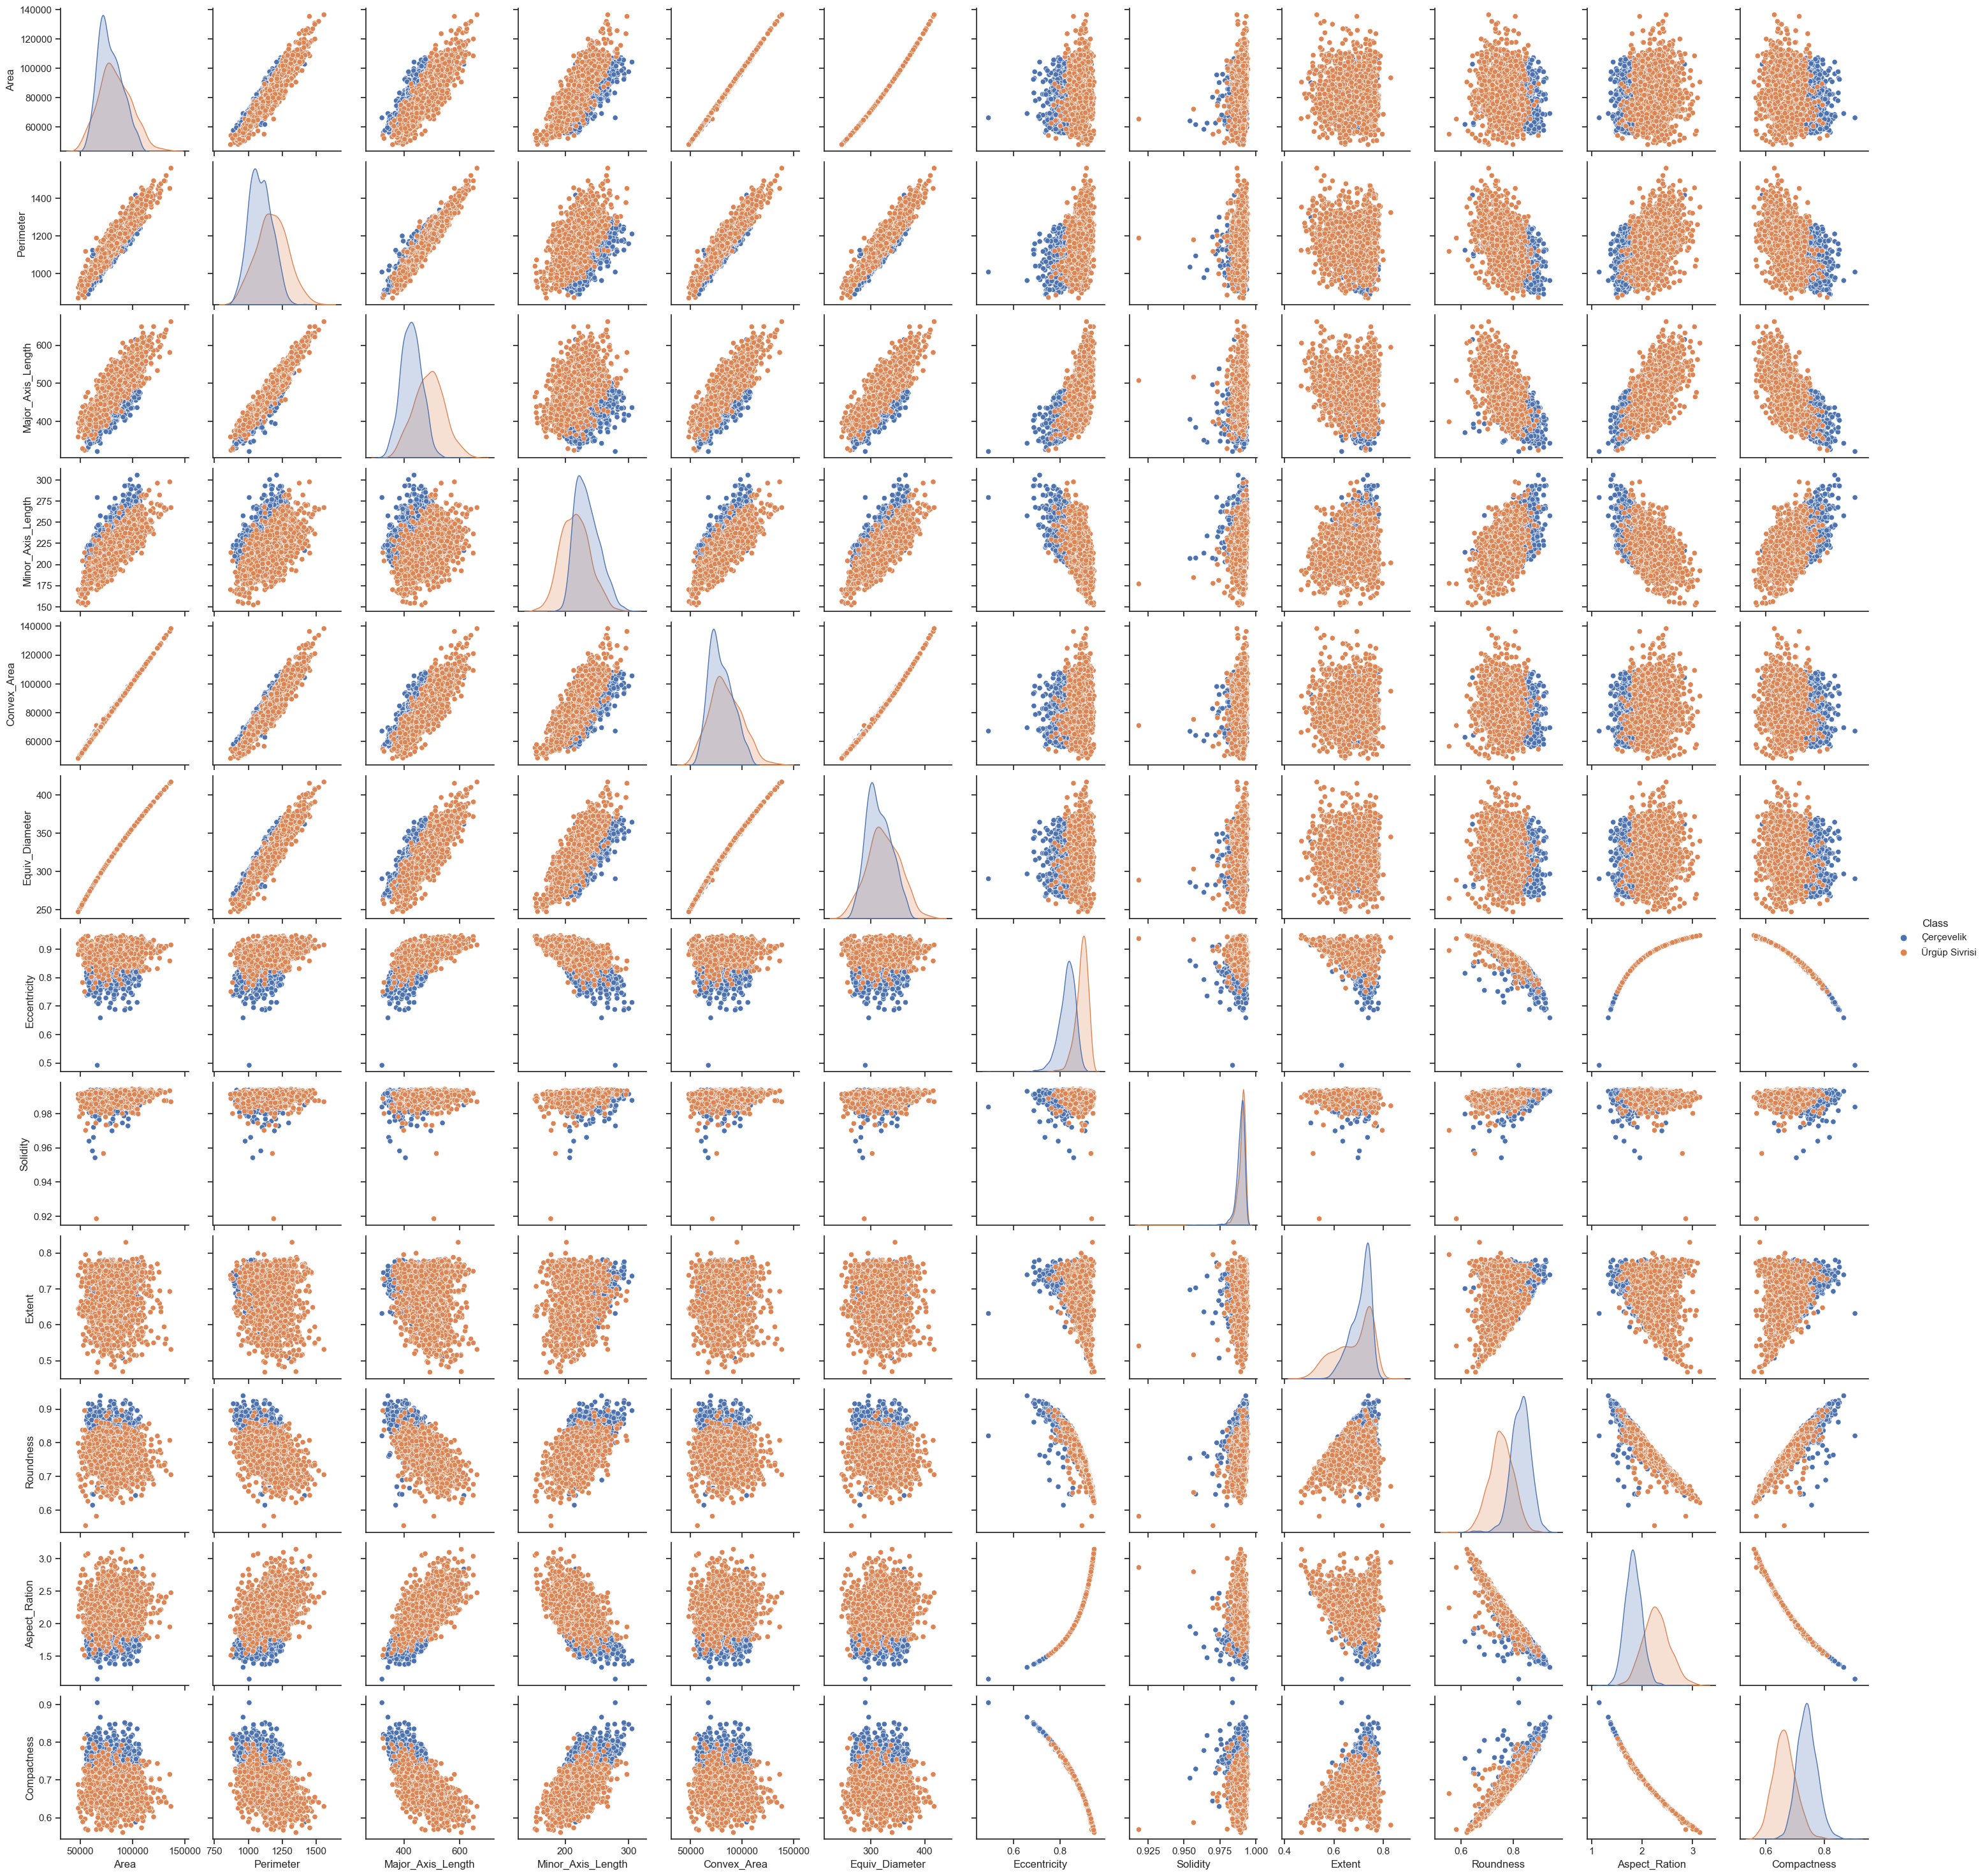

In [22]:
#Scatter Plot Matrix: A scatter plot matrix displays pairwise scatter plots for multiple variables in a grid layout. It helps visualize relationships and distributions across multiple dimensions.
sns.set(style='ticks')
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

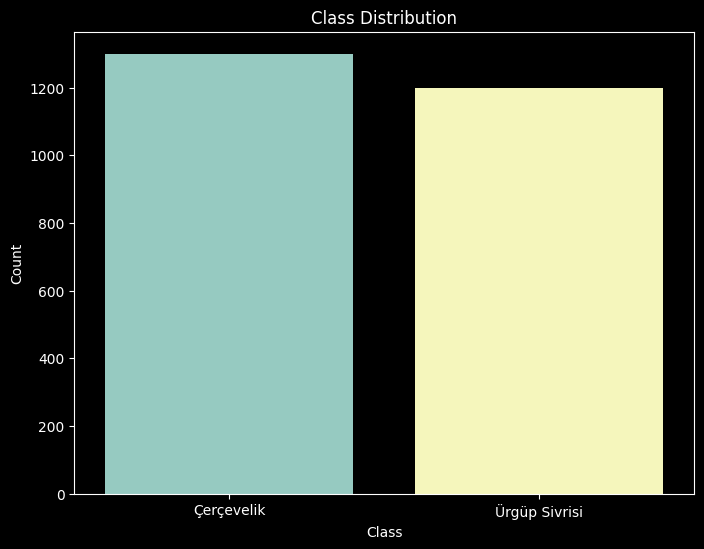

In [3]:
# Bar plot to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

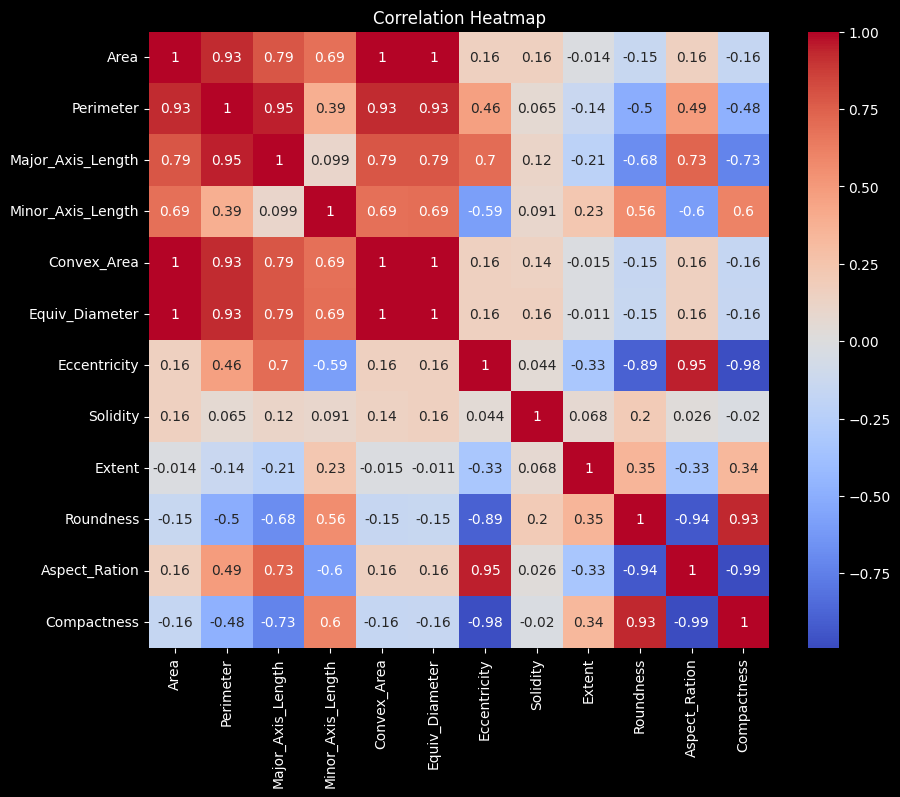

In [5]:
# Correlation heatmap to visualize feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

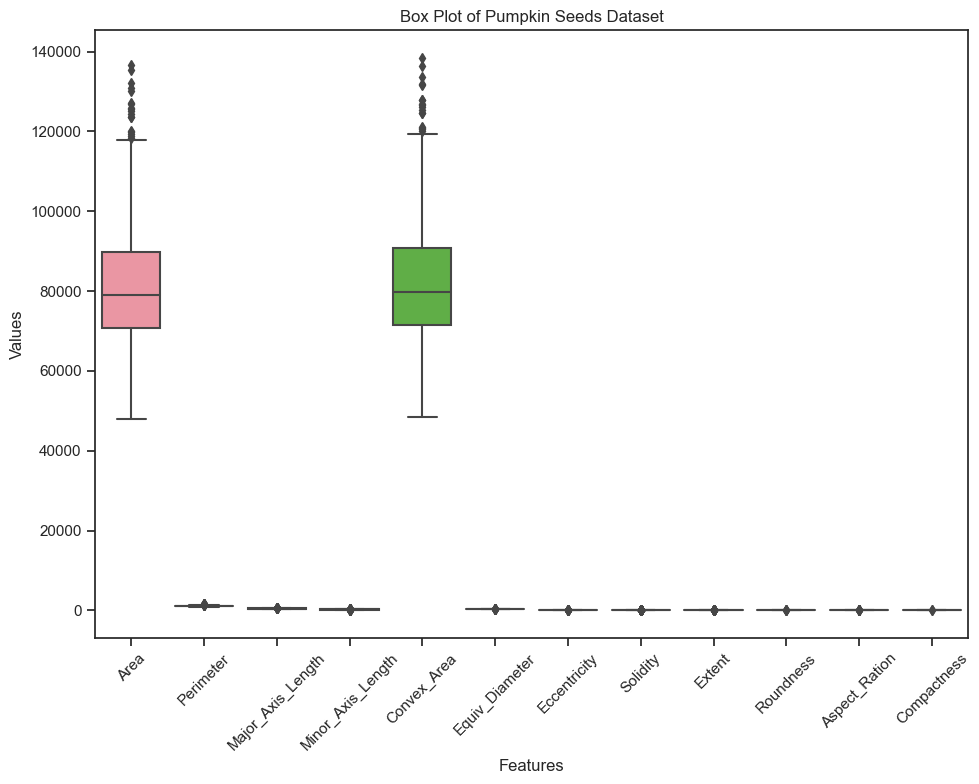

In [10]:
# Creating the box plot
numerical_cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area',
                  'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration',
                  'Compactness']

sns.set(style="ticks")

plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Pumpkin Seeds Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

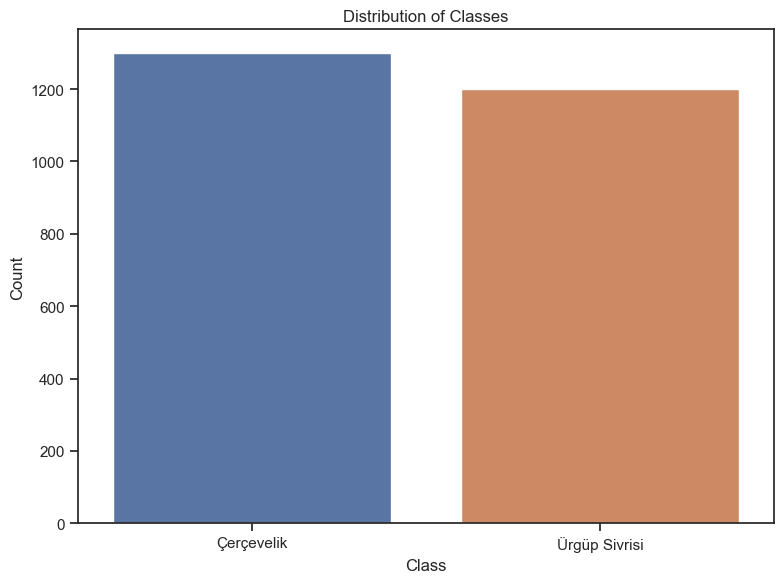

In [11]:
import seaborn as sns

# Create a count plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

Radial Basis Function (RBF) kernel: The RBF kernel is effective in capturing non-linear relationships between features and can handle complex decision boundaries. 

In [13]:
# Split the dataset into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [22]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (2000, 12)
X_test (500, 12)
y_train (2000,)
y_test (500,)


In [24]:
# Creating and training the SVM model with RBF kernel
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [25]:
# Predict the classes for the test set
y_pred = svm_model.predict(X_test)
y_pred

array(['Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik', 'Ürgüp Sivrisi',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Ürgüp Sivrisi',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çer

In [26]:
# Evaluating the model performance
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

   Çerçevelik       0.55      0.90      0.69       251
Ürgüp Sivrisi       0.73      0.27      0.39       249

     accuracy                           0.59       500
    macro avg       0.64      0.58      0.54       500
 weighted avg       0.64      0.59      0.54       500

Accuracy: 0.586


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
cm=confusion_matrix(y_test, y_pred)
cm

array([[227,  24],
       [183,  66]], dtype=int64)

Polynomial SVM:

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Performing feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:

# Creating and training the Polynomial SVM classifier
poly_svm_model = SVC(kernel='poly', degree=3)
poly_svm_model.fit(X_train_scaled, y_train)


SVC(kernel='poly')

In [31]:
# Predict the classes for the test set
y_pred = poly_svm_model.predict(X_test_scaled)


In [35]:
# Evaluating the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

   Çerçevelik       0.77      0.95      0.85       251
Ürgüp Sivrisi       0.94      0.72      0.81       249

     accuracy                           0.84       500
    macro avg       0.86      0.84      0.83       500
 weighted avg       0.85      0.84      0.83       500

Accuracy: 0.836


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
cm=confusion_matrix(y_test, y_pred)
cm

array([[239,  12],
       [ 70, 179]], dtype=int64)

In [36]:
# Split the dataset into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


In [58]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Create and train the SVM regressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [64]:
# Predict the target values for the test set
y_pred = svm_regressor.predict(X_test_scaled)


In [65]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.16285158155717944


The desirable value for the mean squared error (MSE) depends on the specific problem and the scale of the target variable. In general, a lower MSE indicates better model performance, as it signifies that the predicted values are closer to the actual values.